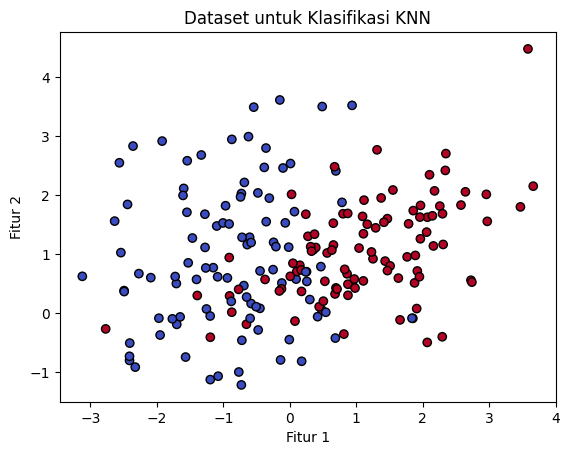

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Dataset untuk Klasifikasi KNN")
plt.savefig('Day_040_01.png', format='png', dpi=300)
plt.show()

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Akurasi Model KNN (k=3):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Akurasi Model KNN (k=3): 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.88      0.91        17

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



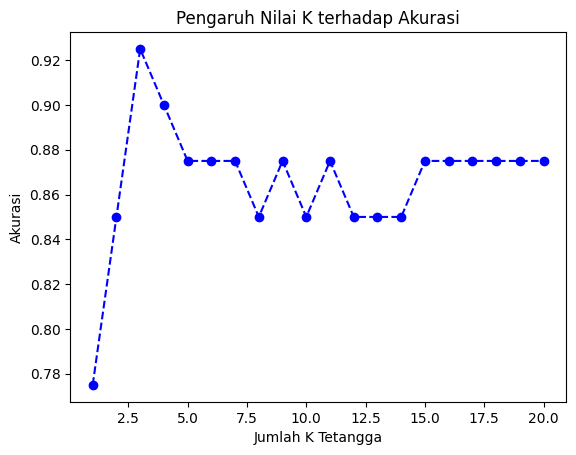

In [5]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Jumlah K Tetangga")
plt.ylabel("Akurasi")
plt.title("Pengaruh Nilai K terhadap Akurasi")
plt.savefig('Day_040_02.png', format='png', dpi=300)
plt.show()

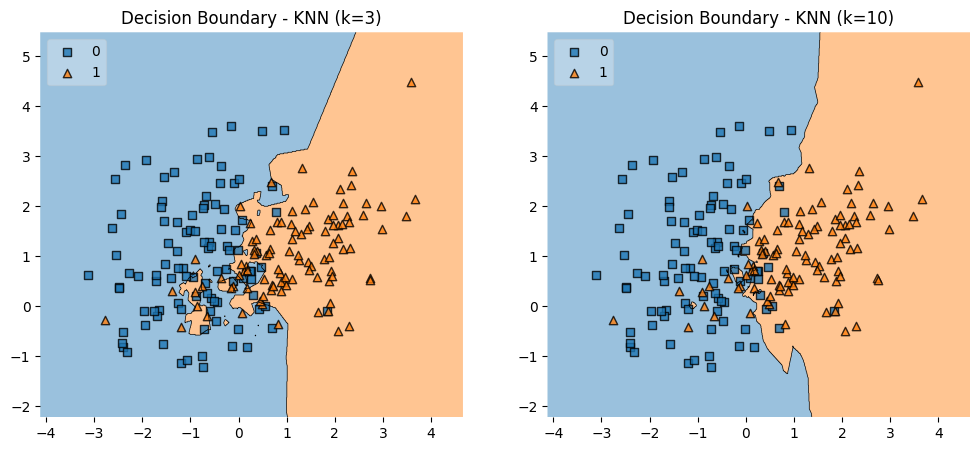

In [6]:
from mlxtend.plotting import plot_decision_regions

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_10 = KNeighborsClassifier(n_neighbors=10)

knn_3.fit(X_train, y_train)
knn_10.fit(X_train, y_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=knn_3, legend=2)
plt.title("Decision Boundary - KNN (k=3)")

plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=knn_10, legend=2)
plt.title("Decision Boundary - KNN (k=10)")
plt.savefig('Day_040_03.png', format='png', dpi=300)
plt.show()

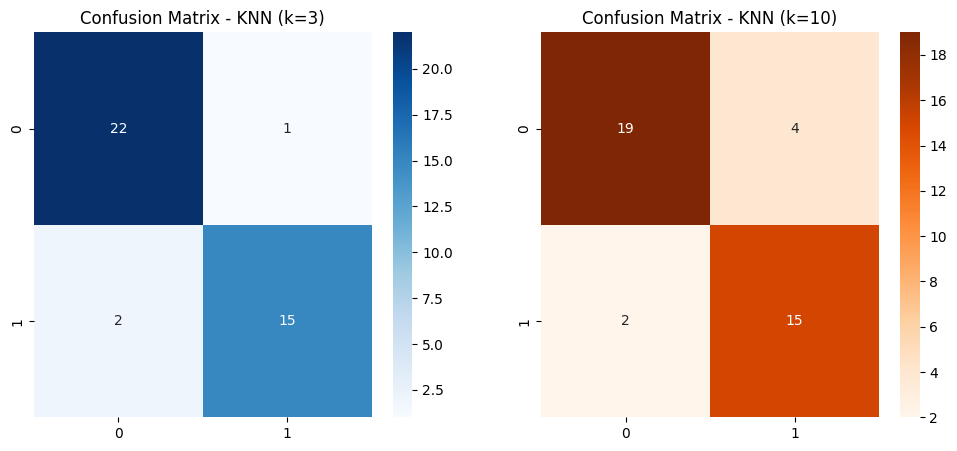

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, knn_3.predict(X_test)), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN (k=3)")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_10.predict(X_test)), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - KNN (k=10)")
plt.savefig('Day_040_04.png', format='png', dpi=300)
plt.show()